# Altitude de dernière saturation $z_{ls}$  

Pour chaque point de grille dans la moyenne troposphère (~5km) on cherche à quelle altitude est le plus proche nuage

<img src="lastsaturation.png" width="500" height="300">


## Importing data and libraries, read data

As shown below different datasets are indexed as follows:  

| Index          | Simulation     | 
| :------------- | :----------:   | 
|    no index    |  SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc                  |  
|        2       | $~~~~~~$SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull.nc   |  
|        3       | SAMUW_rceiso_cyclone_3D.nc                                 |
|        4       | SAMUW_rceiso_cyclone_m60hPad_3D.nc                         |
|        5       | SAMUW_rceiso_squall2_U10_H1000_2km_3D.nc                   |
|        6       | SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.nc               |

In [2]:
from numba import njit,jit
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
data = Dataset('SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc')
data2 = Dataset('SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull.nc')
data3 = Dataset('SAMUW_rceiso_cyclone_3D.nc')
data4 = Dataset('SAMUW_rceiso_cyclone_m60hPad_3D.nc')
data5 = Dataset('SAMUW_rceiso_squall2_U10_H1000_2km_3D.nc')
data6 = Dataset('SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.nc')
print("data:")
print(data)
qc = data.variables['QC'][:]
qi = data.variables['QI'][:]
qsat = data.variables['QSAT'][:]
qv = data.variables['QV'][:]
x = np.asarray(data.variables['x'][:])
y = np.asarray(data.variables['y'][:])
z = np.asarray(data.variables['z'][:])
t = data.variables['time'][:]
t = t - 50

qc2 = data2.variables['QC'][:]
qi2 = data2.variables['QI'][:]
qsat2 = data2.variables['QSAT'][:]
qv2 = data2.variables['QV'][:]
x2 = np.asarray(data2.variables['x'][:])
y2 = np.asarray(data2.variables['y'][:])
z2 = np.asarray(data2.variables['z'][:])
t2 = data2.variables['time'][:]
t2 = t2 - 50

qc3 = data3.variables['QC'][:]
qi3 = data3.variables['QI'][:]
qsat3 = data3.variables['QSAT'][:]
qv3 = data3.variables['QV'][:]
x3 = np.asarray(data3.variables['x'][:])
y3 = np.asarray(data3.variables['y'][:])
z3 = np.asarray(data3.variables['z'][:])
t3 = data3.variables['time'][:]
t3 = t3 - 45

qc4 = data4.variables['QC'][:]
qi4 = data4.variables['QI'][:]
qsat4 = data4.variables['QSAT'][:]
qv4 = data4.variables['QV'][:]
x4 = np.asarray(data4.variables['x'][:])
y4 = np.asarray(data4.variables['y'][:])
z4 = np.asarray(data4.variables['z'][:])
t4 = data4.variables['time'][:]
t4 = t4 - 40

qc5 = data5.variables['QC'][:]
qi5 = data5.variables['QI'][:]
#qsat5 = data5.variables['QSAT'][:]
qv5 = data5.variables['QV'][:]
x5 = np.asarray(data5.variables['x'][:])
y5 = np.asarray(data5.variables['y'][:])
z5 = np.asarray(data5.variables['z'][:])
t5 = data5.variables['time'][:]
#t5 = t5 - 50

qc6 = data6.variables['QC'][:]
qi6 = data6.variables['QI'][:]
qsat6 = data6.variables['QSAT'][:]
qv6 = data6.variables['QV'][:]
x6 = np.asarray(data6.variables['x'][:])
y6 = np.asarray(data6.variables['y'][:])
z6 = np.asarray(data6.variables['z'][:])
t6 = data6.variables['time'][:]
t6 = t6 - 41

print( "qc: ", data.variables['QC'],
       "qi: ", data.variables['QI'],
       "z: ", data.variables['z'],    )
print(t,t2,t3,t4,t5,t6)

data:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Sun Jun 14 13:55:07 2020: ncks -v x,y,z,p,W,TABS,QV,HDOV,O18V,QR,HDOR,O18R,QG,HDOG,O18G,QS,HDOS,O18S,QC,HDOC,O18C,QI,HDOI,O18I,QVMPHY,QRMPHY,QSAT,HDOVMPHY,O18VMPHY,HDORMPHY,O18RMPHY,HDOVak,O18Vak -d z,1,68 tmp.nc inputs/SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc
Sun Jun 14 13:54:59 2020: ncrcat /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000432000.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000440640.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000449280.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000457920.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000466560.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000475200.nc /ccc/store/con

In [3]:
print(data5)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Wed Oct 14 12:53:43 2020: ncks -v x,y,z,p,TABS,QV,HDOV,O18V,QR,HDOR,O18R,QC,HDOC,O18C,QG,HDOG,O18G,QI,HDOI,O18I,QS,HDOS,O18S,QVMPHY,HDOVMPHY,O18VMPHY,W,U,V,PP -F -d z,1,64 tmp.nc inputs/SAMUW_rceiso_squall2_U10_H1000_2km_3D.nc
Wed Oct 14 12:53:37 2020: ncrcat /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_squall2_U10_H1000_2km/rceiso_squall2_U10_H1000_2km_rceiso01_64_0000267840.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_squall2_U10_H1000_2km/rceiso_squall2_U10_H1000_2km_rceiso01_64_0000354240.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_squall2_U10_H1000_2km/rceiso_squall2_U10_H1000_2km_rceiso01_64_0000362880.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_squall2_U10_H1000_2km/rceiso_squall2_U10_H1000_2km_rceiso01_64_0000371520.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_squall2_U10_H1000_2km/rceiso_squall2_U10_H1000_2km_rceiso01_64_0000380160.nc 

- $q_v$ = vapeur  
- $q_r$ = rain  
- $q_c$ = cloud  
- $q_i$ = ice  
- $q_s$ = snow  
- $q_g$ = gropel = grêle  
- $q_{vm\phi}$ = dq/dt microphysics: distinguer condensation/évaporation

## Find index of altitude 5km

In [4]:
i = 0
while z[i] <= max(z):
    if z[i] >= 5000:
        zparcel = z[i]
        izparcel = i
        break
    i+=1
print("index of zparcel: ", izparcel, ", zparcel = ", zparcel)

index of zparcel:  23 , zparcel =  5077.64


## 2D maps of cloud ice mixing ratio $q_i$ and cloud water mixing ratio $q_c$

In [5]:
# QImap = plt.pcolormesh(qi[0,:,:,izparcel], cmap="Blues_r")
# cb = plt.colorbar(QImap)
# cb.set_label("$q_i$ (g/kg)")
# plt.show()
# QCmap = plt.pcolormesh(qc[0,:,:,izparcel], cmap="Blues_r")
# cb = plt.colorbar(QCmap)
# cb.set_label("$q_c$ (g/kg)")
# plt.show()

## First cloud above parcel detection (1D)

Presence of clouds is detected by the quantity $q_c + q_i$ reaching a threshold of $1\times10^{-6}$ g/kg. Above a particular coordinate (x,y), the closest cloud altitude $z_{cloud}$ can be detected as following:

In [6]:
zcloud = 0
thresh = 1e-6
k = izparcel
cond = qc[0,izparcel:,0,0]+qi[0,izparcel:,0,0]
if np.max(cond) - thresh >= 0:
    zcloud = z[np.min(np.where(cond-thresh>=0))] + zparcel
else:
    zcloud = np.max(z)
print("zcloud = ", zcloud)

zcloud =  8127.3604


## First cloud above parcel detection (2D)  
Using the same method, we now find all closest clouds along the $x$-axis

In [7]:
xclouds = np.zeros(len(x))
zclouds = np.zeros(len(x))
thresh = 1e-6
k = izparcel
for i in np.arange(len(x)):
    xclouds[i] = i
    cond = qc[0,izparcel:,0,i]+qi[0,izparcel:,0,i]
    if np.max(cond) - thresh >= 0:
        zclouds[i] = z[np.min(np.where(cond-thresh>=0))] + zparcel
    else:
        zclouds[i] = np.max(z)



### 2D plot result

Cloud base altitude is given along the $x$-axis . Parcel altitude is shown by the red line 

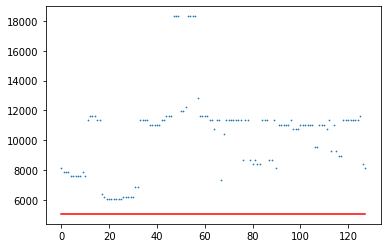

In [8]:
plt.plot(xclouds, np.ones((len(zclouds)))*zparcel, color="r")
plt.scatter(xclouds, zclouds, s=0.5)
plt.show()

## Detection of first cloud above parcel  (3D)  


In [9]:
xclouds = np.zeros(len(x))
yclouds = np.zeros(len(y))
zclouds = np.zeros((len(t),len(x),len(y)))
thresh = 1e-6
for time in np.arange(len(t)):
    for i in np.arange(len(x)):
        for j in np.arange(len(y)):
            xclouds[i] = x[i]
            yclouds[j] = y[j]
            cond = qc[time,izparcel:,j,i]+qi[time,izparcel:,j,i]
            if np.max(cond) - thresh >= 0:
                zclouds[time,i,j] = z[np.min(np.where(cond-thresh>=0))]
            else:
                zclouds[time,i,j] = np.max(z)

### Plot of the result

$z_{clouds}$ is the altitude in meters above the tropospheric parcel ($z_{parcel} \approx$ 5000 m) at which the first cloud is encountered. Following the 2D approach, values of $z = z_{max} \approx$ 18 000 m are given to grid points with no cloud cover.  
Therefore white regions show cloud cover close to the troposphere while blue regions show higher or no cloud cover. 

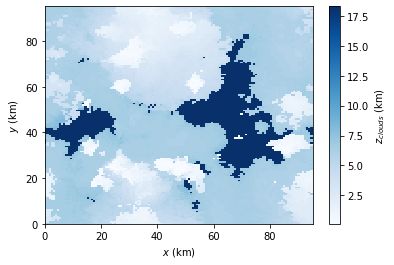

In [10]:
Cloudmap = plt.pcolormesh(xclouds/1000, yclouds/1000, zclouds[0,:,:]/1000, cmap="Blues")
plt.xlabel("$x$ (km)")
plt.ylabel("$y$ (km)")
cb = plt.colorbar(Cloudmap)
cb.set_label('$z_{clouds}$ (km)')
plt.savefig("3Dclouds.eps", format="EPS", dpi=600)
plt.show()

# Pdf of $z_{cloud}$ above 5km

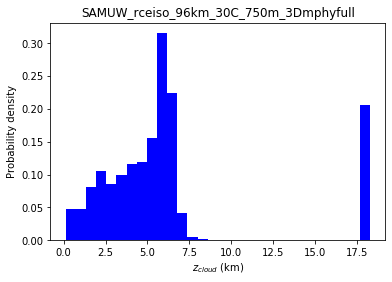

In [11]:
zzclouds = zclouds.flatten()
plt.hist(zzclouds/1000, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_96km_30C_750m_3Dmphyfull')
plt.xlabel('$z_{cloud}$ (km)')
plt.ylabel('Probability density')
plt.show()

# Plot RH at 5km

RH = $q_v/q_{sat}$

In [15]:
print('qsat: ', data.variables['QSAT'], 'qv: ', data.variables['QV'])

qsat:  <class 'netCDF4._netCDF4.Variable'>
float32 QSAT(time, z, y, x)
    long_name: Saturation specific humidity                                                    
    units: g/kg      
unlimited dimensions: time
current shape = (10, 68, 128, 128)
filling on, default _FillValue of 9.969209968386869e+36 used
 qv:  <class 'netCDF4._netCDF4.Variable'>
float32 QV(time, z, y, x)
    long_name: Water Vapor                                                                     
    units: g/kg      
unlimited dimensions: time
current shape = (10, 68, 128, 128)
filling on, default _FillValue of 9.969209968386869e+36 used



In [16]:
rh = np.zeros((len(t),len(x),len(y)))
for time in np.arange(len(t)):
    if time == 0:
        for i in np.arange(len(x)):
            for j in np.arange(len(y)):
                rh[time,i,j] = (qv[time,izparcel,j,i]/qsat[time,izparcel,j,i])/1000
    elif time > 0:
        for i in np.arange(len(x)):
            for j in np.arange(len(y)):
                rh[time,i,j] = (qv[time,izparcel,j,i]/qsat[time,izparcel,j,i])
maxindex = np.unravel_index(rh.argmax(), rh.shape)
print(maxindex)
print(rh[ maxindex[0], maxindex[1], maxindex[2] ])

(5, 53, 106)
1.0592001676559448


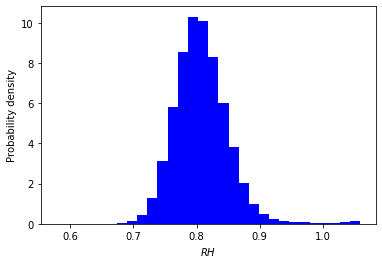

In [17]:
Rh = rh.flatten()
plt.hist(Rh, color='b', density=True, bins=30)
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.show()

## Other datasets  

To perform the same analysis on other datasets, one can define a function for last saturation altitude detection LSA(T,X,Y,Z,QI,QC) that allows to plot the pdf of $z_{clouds}$ as well as 2D images of clouds as shown in section ** Detection of first cloud above parcel (3D) ** (not shown here). One can also build a function RH(T,X,Y,Z,QV,QSAT) from which it is possible to plot the pdf of $RH$.

In [73]:
#@njit
def LSA(T,X,Y,Z,QI,QC):
    i = 0
    while Z[i] <= max(Z):
        if Z[i] >= 5000:
            Zparcel = Z[i]
            iZparcel = i
            break
        i+=1
    xclouds = np.zeros(len(X))
    yclouds = np.zeros(len(Y))
    zclouds = np.zeros( ( len(T),len(X),len(Y) ) )
    thresh = 1e-6
    for time in np.arange(len(T)):
        for i in np.arange(len(X)):
            for j in np.arange(len(Y)):
                xclouds[i] = X[i]
                yclouds[j] = Y[j]
                cond = QC[time,iZparcel:,j,i]+QI[time,iZparcel:,j,i]
                if np.max(cond) - thresh >= 0:
                    zclouds[time,i,j] = Z[np.min(np.where(cond-thresh>=0))]
                else:
                    zclouds[time,i,j] = np.max(Z)
    return xclouds, yclouds, zclouds

In [74]:
zclouds2 = LSA(t2,x2,y2,z2,qi2,qc2)[2].flatten()

In [19]:
zclouds2 = LSA(t2,x2,y2,z2,qi2,qc2)[2].flatten()
zclouds3 = LSA(t3,x3,y3,z3,qi3,qc3)[2].flatten()
zclouds4 = LSA(t4,x4,y4,z4,qi4,qc4)[2].flatten()
zclouds5 = LSA(t5,x5,y5,z5,qi5,qc5)[2].flatten()
zclouds6 = LSA(t6,x6,y6,z6,qi6,qc6)[2].flatten()

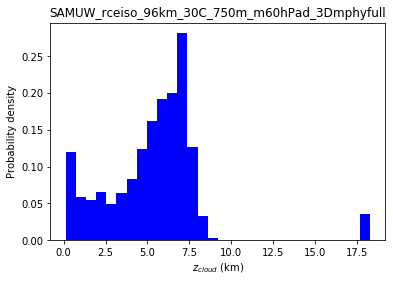

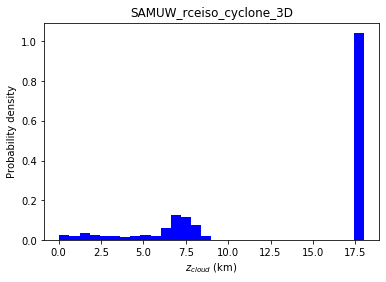

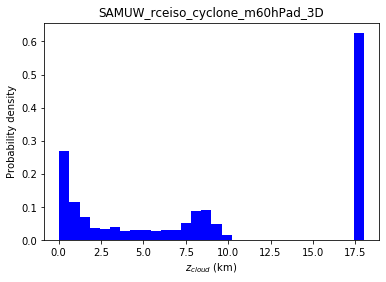

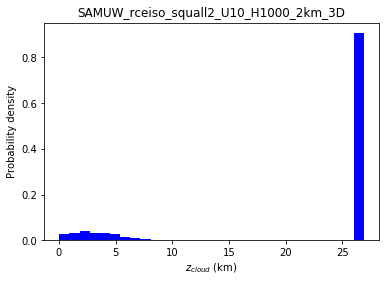

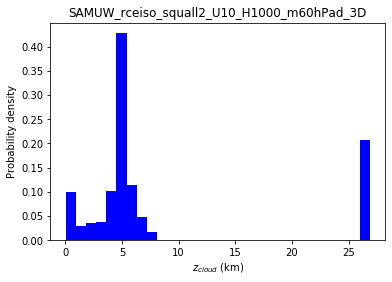

In [20]:
plt.hist(zclouds2/1000, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull')
plt.xlabel('$z_{cloud}$ (km)')
plt.ylabel('Probability density')
plt.show()

plt.hist(zclouds3/1000, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_cyclone_3D')
plt.xlabel('$z_{cloud}$ (km)')
plt.ylabel('Probability density')
plt.show()

plt.hist(zclouds4/1000, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_cyclone_m60hPad_3D')
plt.xlabel('$z_{cloud}$ (km)')
plt.ylabel('Probability density')
plt.show()

plt.hist(zclouds5/1000, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_squall2_U10_H1000_2km_3D')
plt.xlabel('$z_{cloud}$ (km)')
plt.ylabel('Probability density')
plt.show()

plt.hist(zclouds6/1000, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D')
plt.xlabel('$z_{cloud}$ (km)')
plt.ylabel('Probability density')
plt.show()

In [61]:
@njit
def RH(T,X,Y,Z,QV,QSAT):
    RH = np.zeros( (len(T),len(X),len(Y)) )
    i = 0 
    while Z[i] <= max(Z):
        if Z[i] >= 5000:
            Zparcel = Z[i]
            iZparcel = i
            break
        i+=1
    for time in np.arange(len(T)):
        for i in np.arange(len(X)):
            for j in np.arange(len(Y)):
                if 100 < QV[time,iZparcel,j,i]/QSAT[time,iZparcel,j,i] :
                    RH[time,i,j] = (QV[time,iZparcel,j,i]/QSAT[time,iZparcel,j,i])/1000
                else:
                    RH[time,i,j] = (QV[time,iZparcel,j,i]/QSAT[time,iZparcel,j,i])
        
    return RH.flatten()

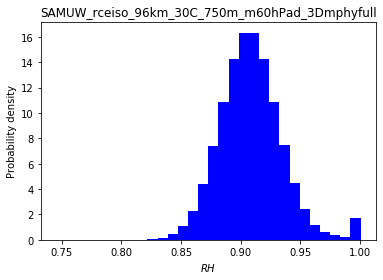

In [65]:
RH2 = RH(t2,x2,y2,z2,qv2,qsat2)
plt.hist(RH2, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull')
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.show()

In [63]:
RH2 = RH(t2,x2,y2,z2,qv2,qsat2)
RH3 = RH(t3,x3,y3,z3,qv3,qsat3)
RH4 = RH(t4,x4,y4,z4,qv4,qsat4)
#RH5 = RH(t5,x5,y5,z5,qv5,qsat5)
RH6 = RH(t6,x6,y6,z6,qv6,qsat6)

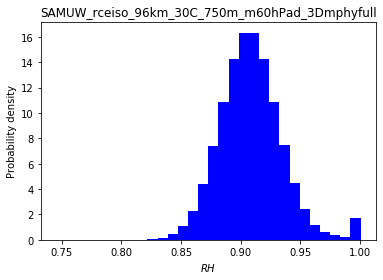

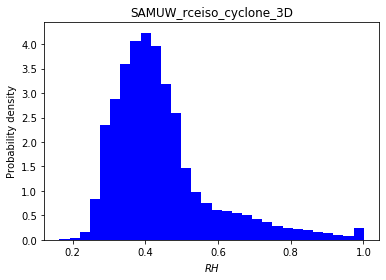

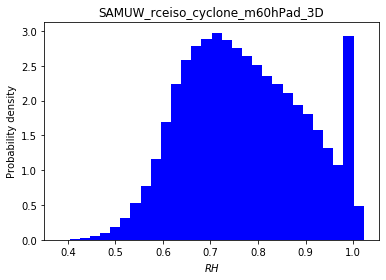

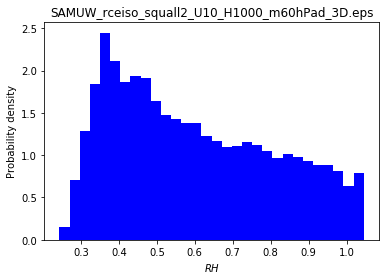

In [76]:
plt.hist(RH2, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull')
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.savefig('RH_pdf_SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull.eps', format='EPS', dpi=600)
plt.show()

plt.hist(RH3, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_cyclone_3D')
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.savefig('RH_pdf_SAMUW_rceiso_cyclone_3D.eps', format='EPS', dpi=600)
plt.show()

plt.hist(RH4, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_cyclone_m60hPad_3D')
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.savefig('RH_pdf_SAMUW_rceiso_cyclone_m60hPad_3D.eps', format='EPS', dpi=600)
plt.show()

#plt.hist(RH5, color='b', density=True, bins=30)
#plt.title('SAMUW_rceiso_squall2_U10_H1000_2km_3D')
#plt.xlabel('$RH$')
#plt.ylabel('Probability density')
#plt.savefig('RH_pdf_SAMUW_rceiso_squall2_U10_H1000_2km_3D', format='EPS', dpi=600)
#plt.show()

plt.hist(RH6, color='b', density=True, bins=30)
plt.title('SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.eps')
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.savefig('RH_pdf_SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.eps', format='EPS', dpi=600)
plt.show()

In [77]:
print('P: ', data5.variables['p'], 'T: ', data5.variables['TABS'])

P:  <class 'netCDF4._netCDF4.Variable'>
float32 p(z)
    units: mb
    long_name: pressure
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
 T:  <class 'netCDF4._netCDF4.Variable'>
float32 TABS(time, z, y, x)
    long_name: Absolute Temperature                                                            
    units: K         
unlimited dimensions: time
current shape = (10, 64, 128, 128)
filling on, default _FillValue of 9.969209968386869e+36 used



In [ ]:
P = data5.variables['p']
Tabs = data5.variables['TABS'][:]
def QSAT(P,T):

    p = P*100
    
    C0= 0.611583699e3
    C1= 0.444606896e2
    C2= 0.143177157e1
    C3= 0.264224321e-1
    C4= 0.299291081e-3
    C5= 0.203154182e-5
    C6= 0.702620698e-8
    C7= 0.379534310e-11
    C8= -0.321582393e-13

    iC0= 0.609868993e3
    iC1= 0.499320233e2
    iC2= 0.184672631e1
    iC3= 0.402737184e-1
    iC4= 0.565392987e-3
    iC5= 0.521693933e-5
    iC6= 0.307839583e-7
    iC7= 0.105785160e-9
    iC8= 0.161444444e-12

    XX = np.zeros(np.shape(T))
    XX[i,j] = np.max(-80, T[i,j]-273.16)

    #ESL = 612.2*np.exp(17.67*XX/(T-29.65))
    ESL = C0 + XX*(C1+XX*(C2+XX*(C3+XX*(C4+XX*(C5+XX*(C6+XX*(C7+XX*C8)))))))
    RSLF = np.zeros(np.shape(p))
    RSLF = 0.622*ESL/(p-ESL)

    ESI = iC0+XX*(iC1+XX*(iC2+XX*(iC3+XX*(iC4+XX*(iC5+XX*(iC6+XX*(iC7+XX*iC8)))))))
    RSIF = 0.622*ESI/(p-ESI)

    if T - 273.15 > 0:
        qsat = RSLF
    else:
        qsat = RSIF
    
    return qsat

In [149]:
T = data5.variables['TABS'][:]
print(np.shape(T))
for time in np.arange(len(t5)):
    for i in np.arange(len(x5)):
        for j in np.arange(len(y5)):
            Tmax = np.max(T[time,izparcel,j,i]-273.16)
            if T > -80
                XX[time,izparcel,j,i] = Tmax
            else:
                XX[time,izparcel,j,i] = -80

(10, 64, 128, 128)
(2, 2, 3)


In [157]:
XX[:,23,:,:] = T[:,23,:,:]-273.16
np.min(XX[:,23,:,:])

-11.751800537109375